# Phase 1 Project

**Authors:** Jules Mejia
<br>
**Instructor name:** Hardik 
<br>
**Date:** Sunday 14 May 2023
***

## Overview

This project is an opportunity to apply the concepts and techniques I have learned in Phase 1 and apply it using real world data. Through data analysis, this report will generate 3 key insights that will aid in the decision making of Microsoft's new movie studio. It is important to communicate visually and provide context to help Microsoft understand the large amount of data that is available to them. Finally, I will provide a recommendation based on the analysis I have generated.


## Business Problem

Microsoft is exploring options to expand the services they provide. Given the success of other large corporate competitors in the video content space, Microsoft have decided to open their own movie studio. Given the lack of experience in an industry dominated by well-established brands, it is important to identify key metrics that Microsoft can build upon. A strong understanding of these metrics will help the studio choose a direction for success.
<br>
<br>
An important aspect for any business entering into a new industry is building an identity. What can Microsoft implement to differentiate themselves from their competitors? I have broken it down into 3 overarching directions.
* Playing The Numbers - Maximise viewership by building upon genres that are trending
* Familiar Faces - Audiences will be attracted to people that have had long term success in the industry
* Stories Are Our Strength - Success is defined by being critically acclaimed and it begins with stories

For the purposes of this project, I will focus on insights regarding Playing The Numbers.

## Data Understanding

The data being used for this analysis have been gathered from well-known websites IMDb, Rotten Tomatoes and TMDB. Each website collects a large amount of information regarding movies in their own way including financial data, review scores and genre. Casting a wide net of data sets will provide a balanced insight, reflective of a big population given the size of the movie industry.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For data visualisation
import matplotlib.ticker as mtick

%matplotlib inline

In [2]:
# I imported all data sets available to check their relevance towards helping me explore my insights
df_titlebasics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df_titlebasics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
df_titleratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
df_titleratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [4]:
df_namebasics = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
df_namebasics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [5]:
df_titleakas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
df_titleakas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [6]:
df_titlecrew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
df_titlecrew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [7]:
df_movieinfo = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
df_movieinfo.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [8]:
df_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='latin-1')
df_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [9]:
df_tmdbmovies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
df_tmdbmovies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [10]:
df_moviebudget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_moviebudget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


These are my comments from a quick overview of the data sets imported

Recommended:
<br>
df_titlebasics - title, genre, runtime. Contains tconst
<br>
df_titleratings - ratings - contains tconst
<br>
df_moviegross - title, gross, studio

Relevant:
<br>
df_titlecrew - find out what director did what movie. See if director has high grossing/high rating movies. Contains tconst
<br>
df_titleprincipal - column with job type. Contains tconst and nconst
<br>
df_movieinfo - box office/director/genre could be useful. Contains id
<br>
df_reviews - reviews by critics. Contains id
<br>
df_tmdbmovies - ratings. Could use movie titles with vote count above mean/median
<br>
df_moviebudget - budget with gross. Contains id

Not relevant:
<br>
df_namebasics - people worked on the movies
<br>
df_titleakas - movie by native country

## Data Preparation

### Insight 1

A simple and great insight to start off with would be to explore which genre had the highest gross. The underlying concept here is that high gross sales equates to more people have viewed that genre of movie.

In [11]:
df_moviebudget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [12]:
# Remove unnecessary strings so it can be converted to an integer for calculation 

df_moviebudget[df_moviebudget.columns[3:6]] = df_moviebudget[df_moviebudget.columns[3:6]].replace('[\#&^$@,]', '',regex=True)

In [13]:
df_moviebudget = df_moviebudget.set_index('movie')
df_moviebudget.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011",410600000,241063875,1045663875
Dark Phoenix,3,"Jun 7, 2019",350000000,42762350,149762350
Avengers: Age of Ultron,4,"May 1, 2015",330600000,459005868,1403013963
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017",317000000,620181382,1316721747


In [14]:
df_titlebasics = df_titlebasics.set_index('primary_title')
df_titlebasics.head()

,tconst,original_title,start_year,runtime_minutes,genres
primary_title,,,,,
Sunghursh,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
One Day Before the Rainy Season,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
The Other Side of the Wind,tt0069049,The Other Side of the Wind,2018,122.0,Drama
Sabse Bada Sukh,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
The Wandering Soap Opera,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [15]:
# I chose df_titlebasics to be on the left because it is the larger data set
# It should have a higher chance of yielding more movies that overlap

df_titlebasics_df_moviebudget = df_moviebudget.join(df_titlebasics, how='left')
df_titlebasics_df_moviebudget.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
#Horror,16,"Nov 20, 2015",1500000,0,0,tt3526286,#Horror,2015.0,101.0,"Crime,Drama,Horror"
(500) Days of Summer,55,"Jul 17, 2009",7500000,32425665,34439060,NaN,NaN,NaN,NaN,NaN
10 Cloverfield Lane,54,"Mar 11, 2016",5000000,72082999,108286422,tt1179933,10 Cloverfield Lane,2016.0,103.0,"Drama,Horror,Mystery"
10 Days in a Madhouse,48,"Nov 11, 2015",12000000,14616,14616,tt3453052,10 Days in a Madhouse,2015.0,111.0,Drama
10 Things I Hate About You,63,"Mar 31, 1999",13000000,38177966,60413950,NaN,NaN,NaN,NaN,NaN


In [16]:
# I want to add a new column to calculate foreign_gross
# This requires changing data types

df_titlebasics_df_moviebudget['domestic_gross'] = df_titlebasics_df_moviebudget['domestic_gross'].astype(int)

In [17]:
df_titlebasics_df_moviebudget['worldwide_gross'] = df_titlebasics_df_moviebudget['worldwide_gross'].astype(float)

In [18]:
df_titlebasics_df_moviebudget['foreign_gross'] = df_titlebasics_df_moviebudget['worldwide_gross'] - df_titlebasics_df_moviebudget['domestic_gross']
df_titlebasics_df_moviebudget.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres,foreign_gross
#Horror,16,"Nov 20, 2015",1500000,0,0.0,tt3526286,#Horror,2015.0,101.0,"Crime,Drama,Horror",0.0
(500) Days of Summer,55,"Jul 17, 2009",7500000,32425665,34439060.0,NaN,NaN,NaN,NaN,NaN,2013395.0
10 Cloverfield Lane,54,"Mar 11, 2016",5000000,72082999,108286422.0,tt1179933,10 Cloverfield Lane,2016.0,103.0,"Drama,Horror,Mystery",36203423.0
10 Days in a Madhouse,48,"Nov 11, 2015",12000000,14616,14616.0,tt3453052,10 Days in a Madhouse,2015.0,111.0,Drama,0.0
10 Things I Hate About You,63,"Mar 31, 1999",13000000,38177966,60413950.0,NaN,NaN,NaN,NaN,NaN,22235984.0


### Insight 2

A studio pouring a large budget into a movie project does not neccessarily equate to high gross sales in the box office. For Microsoft's newest studio, a reasonable budget is an important consideration. In the scenario of a movie flopping in these early stages would hurt Microsoft's reputation both in the short and long term.

In [19]:
df_titlebasics_df_moviebudget['production_budget'] = df_titlebasics_df_moviebudget['production_budget'].astype(int)

In [20]:
df_titlebasics_df_moviebudget.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7221 entries, #Horror to é·æ±ä¸è (CJ7)
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7221 non-null   int64  
 1   release_date       7221 non-null   object 
 2   production_budget  7221 non-null   int32  
 3   domestic_gross     7221 non-null   int32  
 4   worldwide_gross    7221 non-null   float64
 5   tconst             3815 non-null   object 
 6   original_title     3814 non-null   object 
 7   start_year         3815 non-null   float64
 8   runtime_minutes    3328 non-null   float64
 9   genres             3743 non-null   object 
 10  foreign_gross      7221 non-null   float64
dtypes: float64(4), int32(2), int64(1), object(4)
memory usage: 620.6+ KB


In [21]:
df_titlebasics_df_moviebudget.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres,foreign_gross
#Horror,16,"Nov 20, 2015",1500000,0,0.0,tt3526286,#Horror,2015.0,101.0,"Crime,Drama,Horror",0.0
(500) Days of Summer,55,"Jul 17, 2009",7500000,32425665,34439060.0,NaN,NaN,NaN,NaN,NaN,2013395.0
10 Cloverfield Lane,54,"Mar 11, 2016",5000000,72082999,108286422.0,tt1179933,10 Cloverfield Lane,2016.0,103.0,"Drama,Horror,Mystery",36203423.0
10 Days in a Madhouse,48,"Nov 11, 2015",12000000,14616,14616.0,tt3453052,10 Days in a Madhouse,2015.0,111.0,Drama,0.0
10 Things I Hate About You,63,"Mar 31, 1999",13000000,38177966,60413950.0,NaN,NaN,NaN,NaN,NaN,22235984.0


In [22]:
# Calculating profit after the budget and adding a new column

df_titlebasics_df_moviebudget['profit'] = df_titlebasics_df_moviebudget['worldwide_gross'] - df_titlebasics_df_moviebudget['production_budget']

In [23]:
# Checking if changed are applied

df_titlebasics_df_moviebudget.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres,foreign_gross,profit
#Horror,16,"Nov 20, 2015",1500000,0,0.0,tt3526286,#Horror,2015.0,101.0,"Crime,Drama,Horror",0.0,-1500000.0
(500) Days of Summer,55,"Jul 17, 2009",7500000,32425665,34439060.0,NaN,NaN,NaN,NaN,NaN,2013395.0,26939060.0
10 Cloverfield Lane,54,"Mar 11, 2016",5000000,72082999,108286422.0,tt1179933,10 Cloverfield Lane,2016.0,103.0,"Drama,Horror,Mystery",36203423.0,103286422.0
10 Days in a Madhouse,48,"Nov 11, 2015",12000000,14616,14616.0,tt3453052,10 Days in a Madhouse,2015.0,111.0,Drama,0.0,-11985384.0
10 Things I Hate About You,63,"Mar 31, 1999",13000000,38177966,60413950.0,NaN,NaN,NaN,NaN,NaN,22235984.0,47413950.0


In [24]:
# Calculating percentage of profit made and adding a new column
df_titlebasics_df_moviebudget['profit_percentage'] = df_titlebasics_df_moviebudget['profit'] / df_titlebasics_df_moviebudget['production_budget'] * 100

In [25]:
# Checking if changed are applied

df_titlebasics_df_moviebudget.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres,foreign_gross,profit,profit_percentage
#Horror,16,"Nov 20, 2015",1500000,0,0.0,tt3526286,#Horror,2015.0,101.0,"Crime,Drama,Horror",0.0,-1500000.0,-100.000000
(500) Days of Summer,55,"Jul 17, 2009",7500000,32425665,34439060.0,NaN,NaN,NaN,NaN,NaN,2013395.0,26939060.0,359.187467
10 Cloverfield Lane,54,"Mar 11, 2016",5000000,72082999,108286422.0,tt1179933,10 Cloverfield Lane,2016.0,103.0,"Drama,Horror,Mystery",36203423.0,103286422.0,2065.728440
10 Days in a Madhouse,48,"Nov 11, 2015",12000000,14616,14616.0,tt3453052,10 Days in a Madhouse,2015.0,111.0,Drama,0.0,-11985384.0,-99.878200
10 Things I Hate About You,63,"Mar 31, 1999",13000000,38177966,60413950.0,NaN,NaN,NaN,NaN,NaN,22235984.0,47413950.0,364.722692


### Insight 3

One of the many attributes that moviegoers look for to make the decision to watch a movie is its rating. As the studio produces more movies, maintaining high quality will become a challenge so the studio must focus on well performing genres for long term sustained success.

In [26]:
df_tmdbmovies = df_tmdbmovies.set_index('original_title')
df_tmdbmovies.head()

,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
original_title,,,,,,,,,
Harry Potter and the Deathly Hallows: Part 1,0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
How to Train Your Dragon,1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
Iron Man 2,2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368
Toy Story,3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174
Inception,4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186


In [27]:
# Since a large data frame has been previously defined, I will join on top of that

df_tbmb_df_tmdbmovies = df_titlebasics_df_moviebudget.join(df_tmdbmovies, how='left', rsuffix='-tmdb')
df_tbmb_df_tmdbmovies.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres,...,profit_percentage,Unnamed: 0,genre_ids,id-tmdb,original_language,popularity,release_date-tmdb,title,vote_average,vote_count
#Horror,16,"Nov 20, 2015",1500000,0,0.0,tt3526286,#Horror,2015.0,101.0,"Crime,Drama,Horror",...,-100.000000,14656.0,"[18, 9648, 27, 53]",301325.0,de,6.099,2015-11-20,#Horror,3.3,102.0
(500) Days of Summer,55,"Jul 17, 2009",7500000,32425665,34439060.0,NaN,NaN,NaN,NaN,NaN,...,359.187467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Cloverfield Lane,54,"Mar 11, 2016",5000000,72082999,108286422.0,tt1179933,10 Cloverfield Lane,2016.0,103.0,"Drama,Horror,Mystery",...,2065.728440,17422.0,"[53, 878, 18]",333371.0,en,17.892,2016-03-11,10 Cloverfield Lane,6.9,4629.0
10 Days in a Madhouse,48,"Nov 11, 2015",12000000,14616,14616.0,tt3453052,10 Days in a Madhouse,2015.0,111.0,Drama,...,-99.878200,15907.0,[18],345003.0,en,0.955,2015-11-20,10 Days in a Madhouse,5.4,7.0
10 Things I Hate About You,63,"Mar 31, 1999",13000000,38177966,60413950.0,NaN,NaN,NaN,NaN,NaN,...,364.722692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# The final step before modeling is to separate by genre

# For reference, I will use .tail() to check if split and explode are
# applied to xXx movie. Contains Action,Adventure,Thriller
df_tbmb_df_tmdbmovies.tail()

,id,release_date,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres,...,profit_percentage,Unnamed: 0,genre_ids,id-tmdb,original_language,popularity,release_date-tmdb,title,vote_average,vote_count
mother!,59,"Sep 15, 2017",30000000,17800004,42531076.0,NaN,NaN,NaN,NaN,NaN,...,41.770253,20707.0,"[18, 27, 9648]",381283.0,en,15.227,2017-09-15,mother!,7.0,3458.0
xXx,98,"Aug 9, 2002",70000000,141930000,267200000.0,NaN,NaN,NaN,NaN,NaN,...,281.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xXx: Return of Xander Cage,15,"Jan 20, 2017",85000000,44898413,345033359.0,tt1293847,xXx: Return of Xander Cage,2017.0,107.0,"Action,Adventure,Thriller",...,305.921599,20651.0,"[28, 12, 80]",47971.0,en,21.749,2017-01-20,xXx: Return of Xander Cage,5.6,2452.0
Ã l\'intÃ©rieur,57,"Apr 15, 2008",3000000,0,895932.0,NaN,NaN,NaN,NaN,NaN,...,-70.135600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
é·æ±ä¸è (CJ7),2,"Mar 7, 2008",20000000,206678,47300771.0,NaN,NaN,NaN,NaN,NaN,...,136.503855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df_tbmb_df_tmdbmovies['genres'] = df_tbmb_df_tmdbmovies['genres'].str.split(',')
df_tbmb_df_tmdbmovies.tail()

,id,release_date,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres,...,profit_percentage,Unnamed: 0,genre_ids,id-tmdb,original_language,popularity,release_date-tmdb,title,vote_average,vote_count
mother!,59,"Sep 15, 2017",30000000,17800004,42531076.0,NaN,NaN,NaN,NaN,NaN,...,41.770253,20707.0,"[18, 27, 9648]",381283.0,en,15.227,2017-09-15,mother!,7.0,3458.0
xXx,98,"Aug 9, 2002",70000000,141930000,267200000.0,NaN,NaN,NaN,NaN,NaN,...,281.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xXx: Return of Xander Cage,15,"Jan 20, 2017",85000000,44898413,345033359.0,tt1293847,xXx: Return of Xander Cage,2017.0,107.0,"[Action, Adventure, Thriller]",...,305.921599,20651.0,"[28, 12, 80]",47971.0,en,21.749,2017-01-20,xXx: Return of Xander Cage,5.6,2452.0
Ã l\'intÃ©rieur,57,"Apr 15, 2008",3000000,0,895932.0,NaN,NaN,NaN,NaN,NaN,...,-70.135600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
é·æ±ä¸è (CJ7),2,"Mar 7, 2008",20000000,206678,47300771.0,NaN,NaN,NaN,NaN,NaN,...,136.503855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df_tbmb_df_tmdbmovies = df_tbmb_df_tmdbmovies.explode('genres')
df_tbmb_df_tmdbmovies.tail()

,id,release_date,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres,...,profit_percentage,Unnamed: 0,genre_ids,id-tmdb,original_language,popularity,release_date-tmdb,title,vote_average,vote_count
xXx: Return of Xander Cage,15,"Jan 20, 2017",85000000,44898413,345033359.0,tt1293847,xXx: Return of Xander Cage,2017.0,107.0,Action,...,305.921599,20651.0,"[28, 12, 80]",47971.0,en,21.749,2017-01-20,xXx: Return of Xander Cage,5.6,2452.0
xXx: Return of Xander Cage,15,"Jan 20, 2017",85000000,44898413,345033359.0,tt1293847,xXx: Return of Xander Cage,2017.0,107.0,Adventure,...,305.921599,20651.0,"[28, 12, 80]",47971.0,en,21.749,2017-01-20,xXx: Return of Xander Cage,5.6,2452.0
xXx: Return of Xander Cage,15,"Jan 20, 2017",85000000,44898413,345033359.0,tt1293847,xXx: Return of Xander Cage,2017.0,107.0,Thriller,...,305.921599,20651.0,"[28, 12, 80]",47971.0,en,21.749,2017-01-20,xXx: Return of Xander Cage,5.6,2452.0
Ã l\'intÃ©rieur,57,"Apr 15, 2008",3000000,0,895932.0,NaN,NaN,NaN,NaN,NaN,...,-70.135600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
é·æ±ä¸è (CJ7),2,"Mar 7, 2008",20000000,206678,47300771.0,NaN,NaN,NaN,NaN,NaN,...,136.503855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Modeling

In [31]:
# Start with the data frame I will be referencing

df_tbmb_df_tmdbmovies.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres,...,profit_percentage,Unnamed: 0,genre_ids,id-tmdb,original_language,popularity,release_date-tmdb,title,vote_average,vote_count
#Horror,16,"Nov 20, 2015",1500000,0,0.0,tt3526286,#Horror,2015.0,101.0,Crime,...,-100.000000,14656.0,"[18, 9648, 27, 53]",301325.0,de,6.099,2015-11-20,#Horror,3.3,102.0
#Horror,16,"Nov 20, 2015",1500000,0,0.0,tt3526286,#Horror,2015.0,101.0,Drama,...,-100.000000,14656.0,"[18, 9648, 27, 53]",301325.0,de,6.099,2015-11-20,#Horror,3.3,102.0
#Horror,16,"Nov 20, 2015",1500000,0,0.0,tt3526286,#Horror,2015.0,101.0,Horror,...,-100.000000,14656.0,"[18, 9648, 27, 53]",301325.0,de,6.099,2015-11-20,#Horror,3.3,102.0
(500) Days of Summer,55,"Jul 17, 2009",7500000,32425665,34439060.0,NaN,NaN,NaN,NaN,NaN,...,359.187467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Cloverfield Lane,54,"Mar 11, 2016",5000000,72082999,108286422.0,tt1179933,10 Cloverfield Lane,2016.0,103.0,Drama,...,2065.728440,17422.0,"[53, 878, 18]",333371.0,en,17.892,2016-03-11,10 Cloverfield Lane,6.9,4629.0


### Insight 1

The first insight I will model is the highest grossing genre. This will provide an idea of the volume of people that view each type of genre.

In [32]:
gross_genre = df_tbmb_df_tmdbmovies.groupby(df_tbmb_df_tmdbmovies['genres']).agg({'worldwide_gross':'sum', 'domestic_gross':'sum', 'foreign_gross':'sum'})
gross_genre

,worldwide_gross,domestic_gross,foreign_gross
genres,,,
Action,1.482122e+11,5.636668e+10,9.184554e+10
Adventure,1.630503e+11,5.914995e+10,1.039004e+11
Animation,5.662180e+10,2.123028e+10,3.539152e+10
Biography,2.717552e+10,1.281712e+10,1.435840e+10
Comedy,1.035196e+11,4.660139e+10,5.691816e+10
Crime,3.151545e+10,1.467775e+10,1.683770e+10
Documentary,6.556069e+10,2.955705e+10,3.600365e+10
Drama,1.633956e+11,7.604289e+10,8.735271e+10
Family,4.901667e+10,2.080457e+10,2.821209e+10


In [33]:
# The sum totals will be difficult to visualise so I will divide by 10^9 to bring the scale to billions

gross_genre[['worldwide_gross', 'domestic_gross', 'foreign_gross']] = gross_genre[['worldwide_gross', 'domestic_gross', 'foreign_gross']].applymap(lambda x: x / 10**9)
gross_genre

,worldwide_gross,domestic_gross,foreign_gross
genres,,,
Action,148.212221,56.366683,91.845538
Adventure,163.050335,59.149946,103.900388
Animation,56.621798,21.230277,35.391521
Biography,27.175516,12.817115,14.358401
Comedy,103.519551,46.601392,56.918158
Crime,31.515450,14.677753,16.837697
Documentary,65.560692,29.557046,36.003646
Drama,163.395607,76.042892,87.352714
Family,49.016667,20.804575,28.212092


In [34]:
# I will sort by descending order for easier visualisation

gross_genre = gross_genre.sort_values('worldwide_gross', ascending=True)
gross_genre

,worldwide_gross,domestic_gross,foreign_gross
genres,,,
Reality-TV,0.000000,0.000000,0.000000
News,0.399407,0.114292,0.285115
Western,1.497562,0.780310,0.717252
War,5.256075,2.253595,3.002480
Music,6.488494,3.024473,3.464021
Sport,9.611044,4.682471,4.928574
Musical,13.059545,5.839628,7.219918
History,14.307364,6.502390,7.804974
Mystery,21.109605,9.719143,11.390462


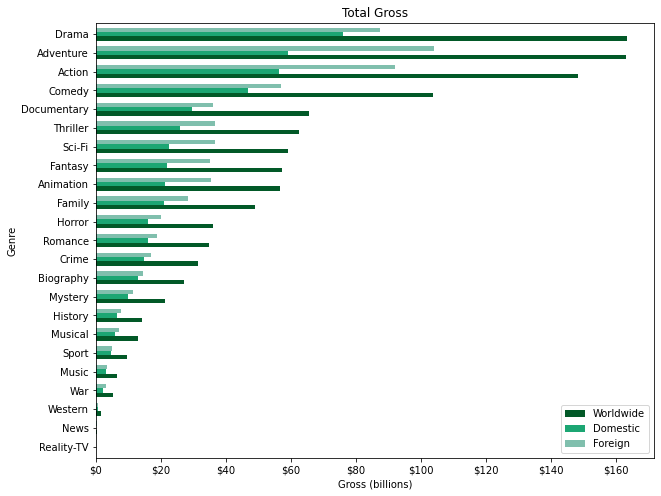

In [35]:
plt.rcParams['figure.figsize'] = (10,8)

color = ['#025928', '#1CA673', '#80BFAD']

ax = gross_genre.plot(kind='barh', width=0.7, color=color, align='center')

ax.set_title("Total Gross")
ax.set_xlabel('Gross (billions)')
ax.set_ylabel('Genre')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

ax.legend(['Worldwide', 'Domestic', 'Foreign'], loc=4)

plt.savefig("Visualisations/gross_genre.png", bbox_inches='tight')

plt.show();

### Insight 2

The second insight I will model is which genre is the most profitable. This will be based on the percentage of profit made per genre and average amount of profit per genre.

In [36]:
profit_percentage_genre = df_tbmb_df_tmdbmovies.groupby(df_tbmb_df_tmdbmovies['genres'], as_index=False).agg({'profit_percentage':'mean'})
profit_percentage_genre

,genres,profit_percentage
0,Action,298.185008
1,Adventure,274.470511
2,Animation,822.403617
3,Biography,603.661885
4,Comedy,336.166994
5,Crime,161.654953
6,Documentary,989.446250
7,Drama,479.231386
8,Family,1047.049246
9,Fantasy,568.555823


In [37]:
profit_avg_genre = df_tbmb_df_tmdbmovies.groupby(df_tbmb_df_tmdbmovies['genres'], as_index=False).agg({'profit':'mean'})
profit_avg_genre

,genres,profit
0,Action,1.124031e+08
1,Adventure,1.944395e+08
2,Animation,1.993639e+08
3,Biography,4.887478e+07
4,Comedy,7.210473e+07
5,Crime,3.765710e+07
6,Documentary,5.283761e+07
7,Drama,4.090176e+07
8,Family,1.207971e+08
9,Fantasy,1.709568e+08


In [38]:
# Again I will change the scale to millions

profit_avg_genre[['profit']] = profit_avg_genre[['profit']].applymap(lambda x: x / 10**6)
profit_avg_genre

,genres,profit
0,Action,112.403094
1,Adventure,194.439547
2,Animation,199.363920
3,Biography,48.874782
4,Comedy,72.104728
5,Crime,37.657102
6,Documentary,52.837610
7,Drama,40.901760
8,Family,120.797131
9,Fantasy,170.956831


In [39]:
# Not sure why but without resetting the index for both data frames, I am unable to plot

profit_percentage_genre.reset_index()

,index,genres,profit_percentage
0,0,Action,298.185008
1,1,Adventure,274.470511
2,2,Animation,822.403617
3,3,Biography,603.661885
4,4,Comedy,336.166994
5,5,Crime,161.654953
6,6,Documentary,989.446250
7,7,Drama,479.231386
8,8,Family,1047.049246
9,9,Fantasy,568.555823


In [40]:
profit_avg_genre.reset_index()

,index,genres,profit
0,0,Action,112.403094
1,1,Adventure,194.439547
2,2,Animation,199.363920
3,3,Biography,48.874782
4,4,Comedy,72.104728
5,5,Crime,37.657102
6,6,Documentary,52.837610
7,7,Drama,40.901760
8,8,Family,120.797131
9,9,Fantasy,170.956831


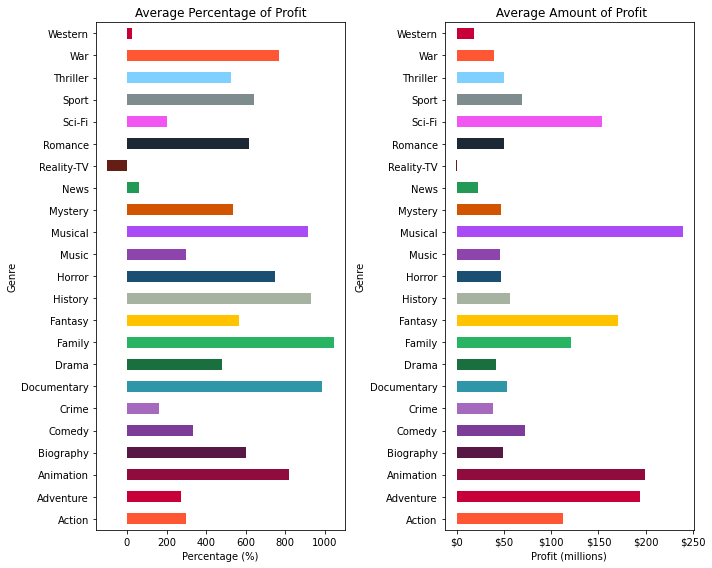

In [41]:
colors = ['#FF5733', '#C70039', '#900C3F', '#581845', '#7D3C98', '#A569BD', '#2F96A8', '#196F3D', '#28B463', '#FFC300', '#A7B3A1', '#1B4F72', '#8E44AD', '#AA4BF5', '#D35400', '#229954', '#641E16', '#1C2833', '#F155F2', '#7F8C8D', '#80D0FF']

plt.rcParams['figure.figsize'] = (10,8)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_tight_layout(True)

profit_percentage_genre.plot(x='genres', y='profit_percentage', kind='barh', ax=ax1, color=colors)
profit_avg_genre.plot(x='genres', y='profit', kind='barh', ax=ax2, color=colors)

ax1.set_title("Average Percentage of Profit")
ax1.set_xlabel("Percentage (%)")
ax1.set_ylabel("Genre")
ax1.legend().remove()

ax2.set_title(" Average Amount of Profit")
ax2.set_xlabel("Profit (millions)")
ax2.set_ylabel("Genre")
ax2.legend().remove()

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax2.xaxis.set_major_formatter(tick)

plt.savefig("Visualisations/profit_ptc_avg.png", bbox_inches='tight')

plt.show();

### Insight 3

For my final insight I will model the average rating versus the average gross. I chose average gross instead of average profit because it encompasses all expenses involved in producing a movie.

For example a high budget movie may also get a high rating but not earn high profits.

In [42]:
# Beginning with my original data frame

df_tbmb_df_tmdbmovies.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres,...,profit_percentage,Unnamed: 0,genre_ids,id-tmdb,original_language,popularity,release_date-tmdb,title,vote_average,vote_count
#Horror,16,"Nov 20, 2015",1500000,0,0.0,tt3526286,#Horror,2015.0,101.0,Crime,...,-100.000000,14656.0,"[18, 9648, 27, 53]",301325.0,de,6.099,2015-11-20,#Horror,3.3,102.0
#Horror,16,"Nov 20, 2015",1500000,0,0.0,tt3526286,#Horror,2015.0,101.0,Drama,...,-100.000000,14656.0,"[18, 9648, 27, 53]",301325.0,de,6.099,2015-11-20,#Horror,3.3,102.0
#Horror,16,"Nov 20, 2015",1500000,0,0.0,tt3526286,#Horror,2015.0,101.0,Horror,...,-100.000000,14656.0,"[18, 9648, 27, 53]",301325.0,de,6.099,2015-11-20,#Horror,3.3,102.0
(500) Days of Summer,55,"Jul 17, 2009",7500000,32425665,34439060.0,NaN,NaN,NaN,NaN,NaN,...,359.187467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Cloverfield Lane,54,"Mar 11, 2016",5000000,72082999,108286422.0,tt1179933,10 Cloverfield Lane,2016.0,103.0,Drama,...,2065.728440,17422.0,"[53, 878, 18]",333371.0,en,17.892,2016-03-11,10 Cloverfield Lane,6.9,4629.0


In [43]:
avg_rating_gross = df_tbmb_df_tmdbmovies.groupby(df_tbmb_df_tmdbmovies['genres'], as_index=False).agg({'worldwide_gross':'mean', 'vote_average':'mean'})
avg_rating_gross

,genres,worldwide_gross,vote_average
0,Action,1.737541e+08,6.001493
1,Adventure,2.801552e+08,6.232475
2,Animation,2.735353e+08,6.230387
3,Biography,7.633572e+07,6.485304
4,Comedy,1.053098e+08,6.141310
5,Crime,6.444877e+07,6.073086
6,Documentary,8.341055e+07,6.084355
7,Drama,6.601843e+07,6.292326
8,Family,1.684422e+08,6.150207
9,Fantasy,2.360273e+08,6.087619


In [44]:
# Again to bring units into a nice scale
avg_rating_gross[['worldwide_gross']] = avg_rating_gross[['worldwide_gross']].applymap(lambda x: x / 10**6)
avg_rating_gross

,genres,worldwide_gross,vote_average
0,Action,173.754070,6.001493
1,Adventure,280.155214,6.232475
2,Animation,273.535255,6.230387
3,Biography,76.335720,6.485304
4,Comedy,105.309817,6.141310
5,Crime,64.448773,6.073086
6,Documentary,83.410549,6.084355
7,Drama,66.018427,6.292326
8,Family,168.442154,6.150207
9,Fantasy,236.027265,6.087619


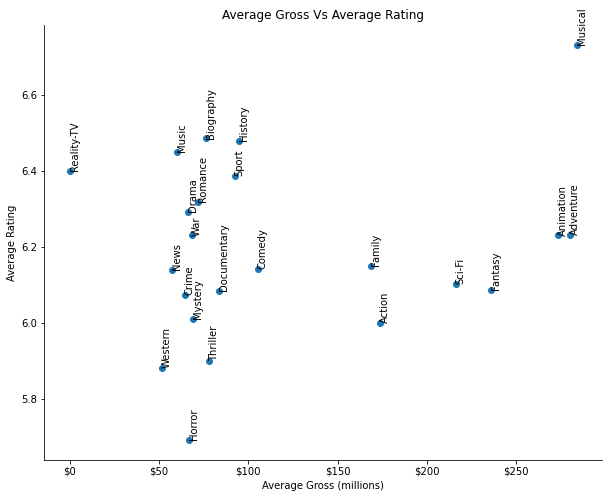

In [45]:
plt.rcParams['figure.figsize'] = (10,8)

fig, ax = plt.subplots()

ax.scatter(avg_rating_gross['worldwide_gross'], avg_rating_gross['vote_average'])

# To make genre appear on the scatter plot. Easier to interpret versus a legend
for i, txt in enumerate(avg_rating_gross['genres']):
    ax.text(avg_rating_gross['worldwide_gross'][i], avg_rating_gross['vote_average'][i], txt, rotation=90, va='bottom')

ax.set_title("Average Gross Vs Average Rating")
ax.set_xlabel('Average Gross (millions)')
ax.set_ylabel('Average Rating')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("Visualisations/avg_rating_gross.png", bbox_inches='tight')

plt.show();

## Evaluation

For my evaluation, I want to identify the top 3 performing genres for each insight. This will help the studio identify key genres to focus on and hopefully identify a common well performing genre across all insights

### Insight 1 
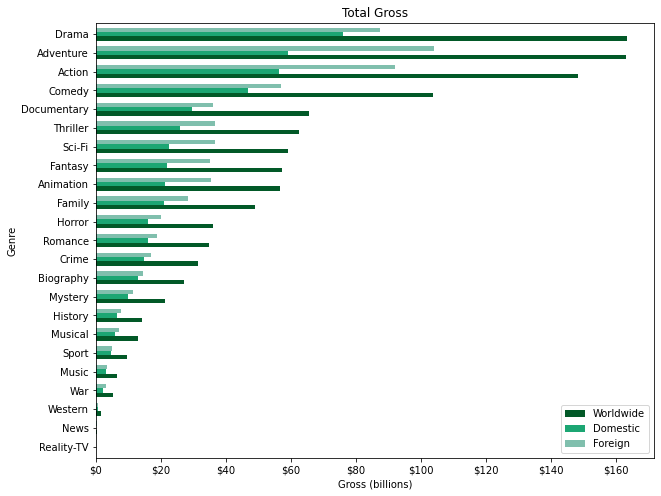

I specifically chose to order this bar graph by highest grossing to least grossing because it would be an easy way to identify the top genres. The top 3 by worldwide gross are **Drama, Adventure and Action**. I have also included the Domestic and Foreign and Gross numbers because it is important to note that the movie being produced reach a global audience. For every genre, Foreign gross numbers were greater than the Domestic gross numbers. A movie that appeals to both the domestic and foreign audience can go a long way into the final gross numbers

### Insight 2

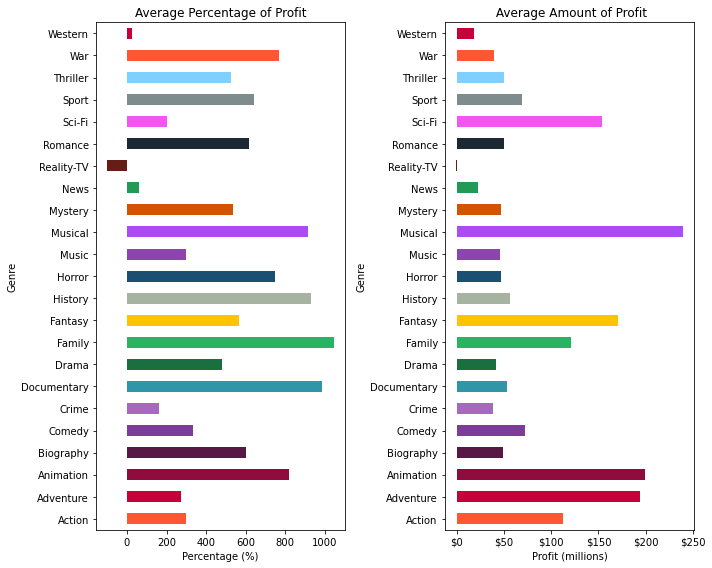

Budget plays a big part in the production of a movie. Ideally, Microsoft would not like to pour funds into a movie that could end up making a net loss. In order to identify, I modelled two graphs to identify the relationshop between budget and the profitability for each genre.

The Average Percentage of Profit graph indicates each genres ability to generate profit based on their budget. For example, if an action movie had a budget of \\$1 million, it would be able to produce 300% of profit which equates to \\$3 million. Therefore, a genre like musicals with a higher percentage can have a lower budget to reach the same profit.

However, the Average Percentage of Profit could be misleading if it is not seen in context with the Average Amount of Profit graph. This graph shows how much profit each genre actually made. A genre may have a high percentage to yield a high profit, as we can see in this graph as well as the Total Gross graph, that is not the case in physical sales.

For the Average Percentage of Profit graph, the top 3 genres are **Family, Documentary and Musical**. In general, these movies usually have a lower budget compared to other genres.

For the Average Amount of Profit graph, the top 3 genres are **Musical, Animation and Adventure**. Both the Musical and Animation genre are able to take advantage of their ability to make profit and generate high profit.

### Insight 3
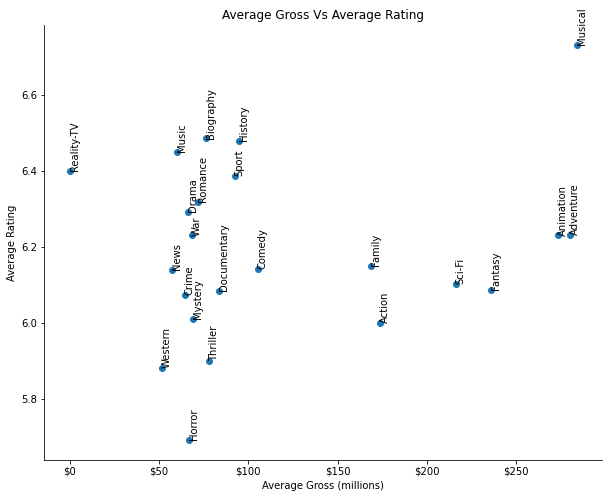

One way to support the strong sales displayed in the Top Gross graph and generate long term success is through ratings. Audiences will use ratings as part of their decision making for watching a movie. Generating well rated movies could generate new/repeat viewers (meaning more gross/profit). The Average Gross Vs Average Rating graph helps identify which genres do both well and the top 3 are **Musicals, Adventure and Animation**.

## Conclusions

These are the top performers for each insight
* Insight 1: Drama, Adventure and Action
* Insight 2: Family, Documentary and Musical and Musical, Animation and Adventure
* Insight 3: Musicals, Adventure and Animation

Based on these results, it is my recommendation that Microsoft's newest studio focus on releasing an **Adventure** movie. Although it requires a higher budget to yield a higher profit, it is still able to reach those high marks based on the gross sales. A middle of the pack genre rating but again, its ability to generate a high gross makes this a solid direction moving forward.

A surprising and well performing genre is musicals. Its total gross sales are in the bottom third but has great potential to generate profit and rate very well with audiences. If the studio is able to generate enough popularity for a musical movie, it could do very well.

Genres to avoid would be war and westerns. They do not perform well in any insight and are era specific. They most likely appeal to a smaller size of the wider audience.

For further exploration, I would like to explore the strength of covariance and correlation between the insights I have generated. It would provide a deeper context and allow the studio to be more confident in the direction they choose. When the studio makes a decision on a genre, the next insight to explore would be when in the year it would be best to release it. 

Furthermore, given the extensive amount of data available, I would like to explore the other 2 overarching directions I mentioned at the beginning of this project, Familar Faces and Stories Are Our Strength. Actors, directors and story all play a part in the production of a movie and I would like to explore how that relates to gross sales, budget and ratings. 